# .. Crop Recommendation System ..

UNDER THE GUIDENCE OF ASHWINI KAKDE MAM


FROM THE BATCH ML9 


SANKET BHADANE

In [1]:
#pandas
import pandas as pd

#matplotlib
import matplotlib.pyplot as plt

#seaborn
import seaborn as sns

#sklearn
from sklearn import metrics
from sklearn.metrics import classification_report

#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Crop_recommendation.csv")
df.head(3)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice


In [3]:
df.tail(3)

,N,P,K,temperature,humidity,ph,rainfall,label
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [4]:
df.size

17600

In [5]:
df.shape

(2200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 129.0+ KB


In [7]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

# Data fields :


    
N            - ratio of Nitrogen content in soil

P            - ratio of Phosphorous content in soil

K            - ratio of Potassium content in soil

temperature  - temperature in degree Celsius

humidity     - relative humidity in %

ph           - ph value of the soil

rainfall     - rainfall in mm

In [8]:
#Create unique variable
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [9]:
df.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [10]:
#counts of variable
df['label'].value_counts()

papaya         100
chickpea       100
watermelon     100
orange         100
blackgram      100
mothbeans      100
coconut        100
maize          100
cotton         100
pigeonpeas     100
lentil         100
muskmelon      100
kidneybeans    100
grapes         100
rice           100
pomegranate    100
banana         100
apple          100
coffee         100
jute           100
mungbean       100
mango          100
Name: label, dtype: int64

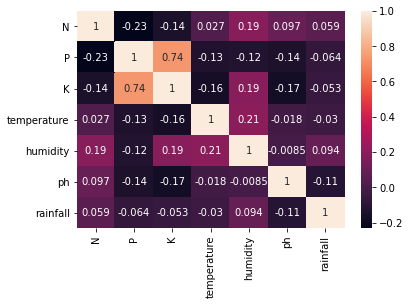

In [11]:
#heatmap
sns.heatmap(df.corr(),annot=True)

# Visualizing Correlations :

In [12]:
#Summary of My DataSet
crop_summary = pd.pivot_table(df,index=['label'],aggfunc='mean')
crop_summary


,K,N,P,humidity,ph,rainfall,temperature
label,,,,,,,
apple,199.89,20.80,134.22,92.333383,5.929663,112.654779,22.630942
banana,50.05,100.23,82.01,80.358123,5.983893,104.626980,27.376798
blackgram,19.24,40.02,67.47,65.118426,7.133952,67.884151,29.973340
chickpea,79.92,40.09,67.79,16.860439,7.336957,80.058977,18.872847
coconut,30.59,21.98,16.93,94.844272,5.976562,175.686646,27.409892
coffee,29.94,101.20,28.74,58.869846,6.790308,158.066295,25.540477
cotton,19.56,117.77,46.24,79.843474,6.912675,80.398043,23.988958
grapes,200.11,23.18,132.53,81.875228,6.025937,69.611829,23.849575
jute,39.99,78.40,46.86,79.639864,6.732778,174.792798,24.958376


In [13]:
crop_summary_new = crop_summary.reset_index()

For Nitrogen :

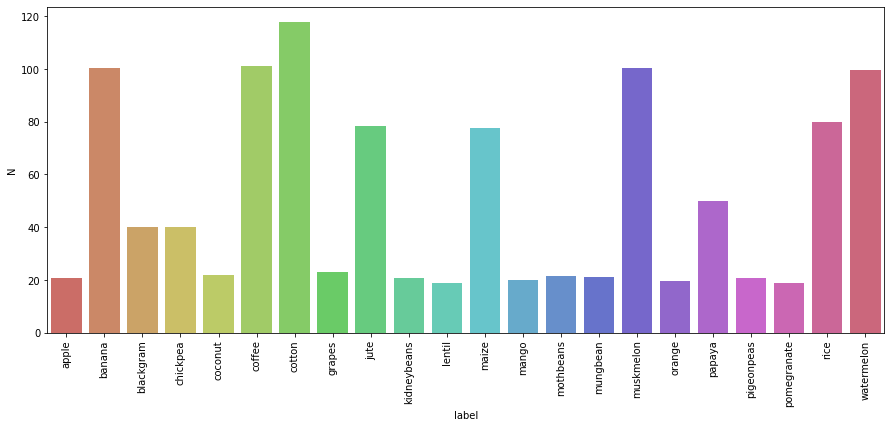

In [14]:

plt.figure(figsize=(15,6))
sns.barplot(y = 'N', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

Findings : Watermelon, Rice, Papaya, Muskmelon, Maize, Jute,
 Cotton, Coffee, and Banana require relatively more Nitrogen than the rest of the classes

For Phosphorous :

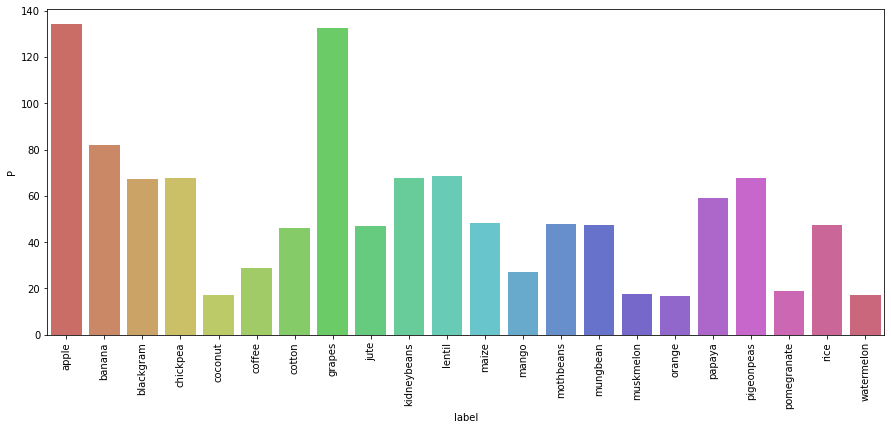

In [15]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'P', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

Finding : Apple, Banana and Grapes require relatively more Phosphorous than the rest of the classes

For Potassium :

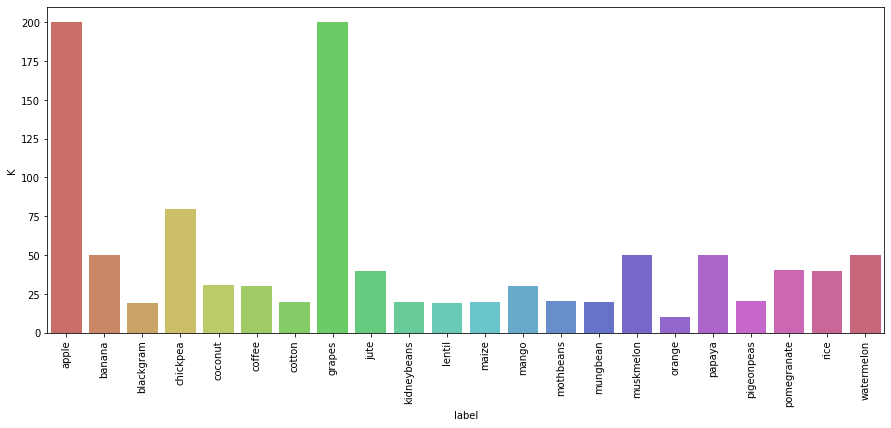

In [16]:
plt.figure(figsize=(15,6))
sns.barplot(y = 'K', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

Finding : Apple and Grapes require relatively more Phosphorous than the rest of the classes

For temperature : 


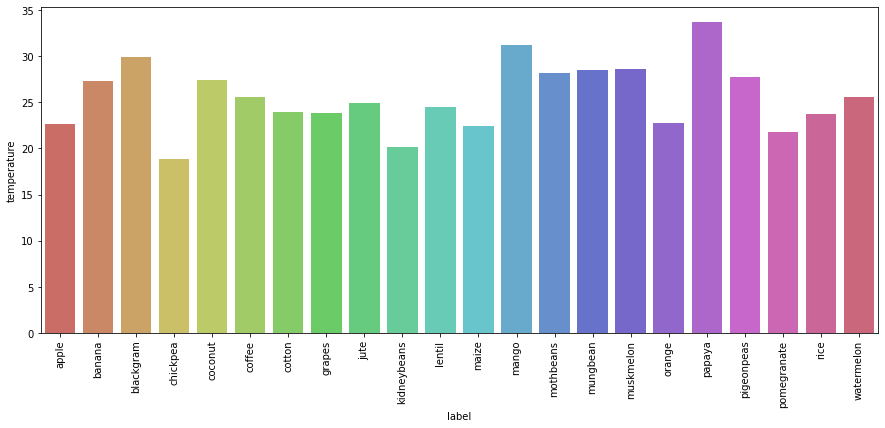

For humidity :


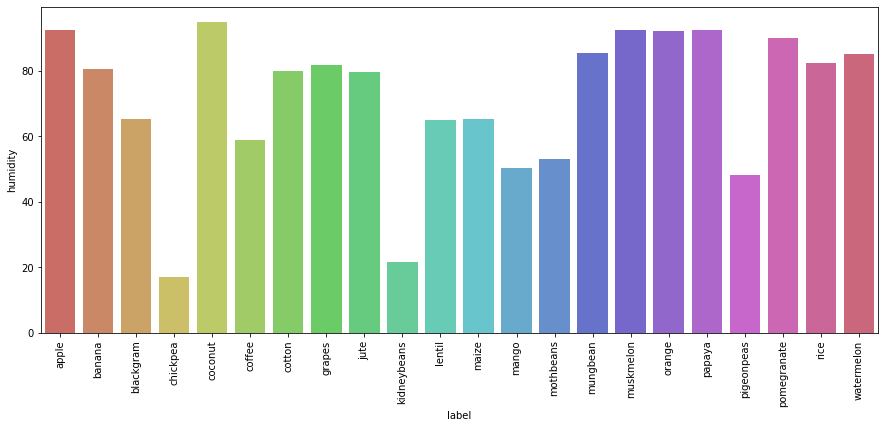

For ph :


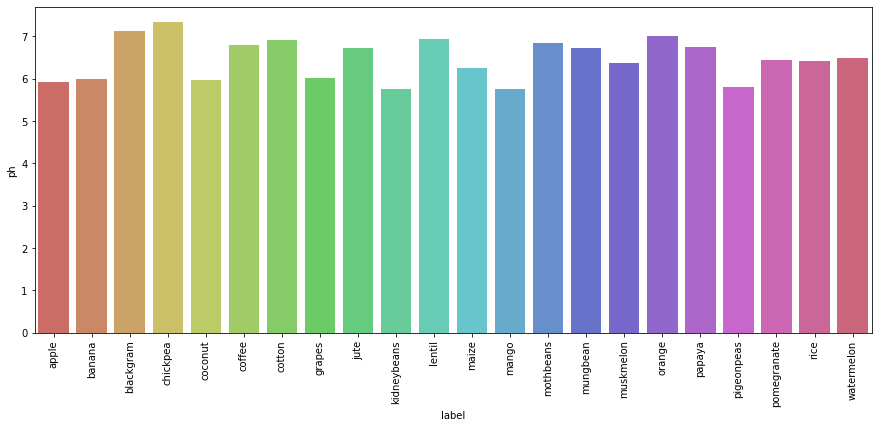

For rainfall :


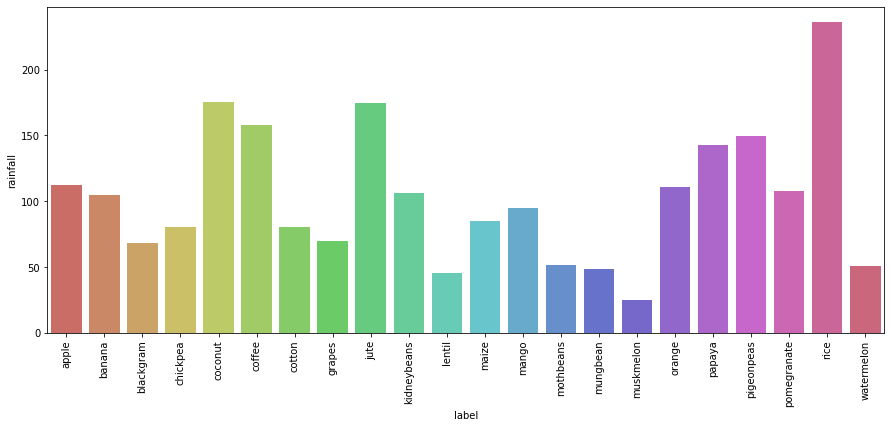

In [17]:
print("For temperature : ")
plt.figure(figsize=(15,6))
sns.barplot(y = 'temperature', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

print("For humidity :")
plt.figure(figsize=(15,6))
sns.barplot(y = 'humidity', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

print("For ph :")
plt.figure(figsize=(15,6))
sns.barplot(y = 'ph', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

print("For rainfall :")
plt.figure(figsize=(15,6))
sns.barplot(y = 'rainfall', x = 'label', data=crop_summary_new, palette = 'hls')
plt.xticks(rotation = 90)
plt.show()

# Seperating features and target label :

In [18]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['label']
labels = df['label']

In [19]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [20]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [21]:
print("Shape of Xtrain : ",Xtrain.shape)
print("Shape of Ytrain : ",Ytrain.shape)
 
print("--------------------------------")

print("Shape of Xtest : ",Xtest.shape)
print("Shape of Ytest : ",Ytest.shape)

Shape of Xtrain :  (1760, 7)
Shape of Ytrain :  (1760,)
--------------------------------
Shape of Xtest :  (440, 7)
Shape of Ytest :  (440,)


# Using Algorithms :

# Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  90.0
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.59      1.00      0.74        16
    chickpea       1.00      1.00      1.00        21
     coconut       0.91      1.00      0.95        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.74      0.93      0.83        28
 kidneybeans       0.00      0.00      0.00        14
      lentil       0.68      1.00      0.81        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00   

k-Fold Cross Validation Technique..

In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# Cross validation score (Decision Tree)
score1 = cross_val_score(DecisionTree, features, target,cv=5)

In [25]:
score1

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

In [26]:
score1.mean()

0.9140909090909091

# Support Vector Machine (SVM) :

In [27]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.10681818181818181
              precision    recall  f1-score   support

       apple       1.00      0.23      0.38        13
      banana       1.00      0.24      0.38        17
   blackgram       1.00      0.19      0.32        16
    chickpea       1.00      0.05      0.09        21
     coconut       1.00      0.05      0.09        21
      coffee       0.00      0.00      0.00        22
      cotton       1.00      0.05      0.10        20
      grapes       1.00      0.06      0.11        18
        jute       1.00      0.07      0.13        28
 kidneybeans       0.03      1.00      0.07        14
      lentil       0.00      0.00      0.00        23
       maize       0.00      0.00      0.00        21
       mango       0.00      0.00      0.00        26
   mothbeans       0.00      0.00      0.00        19
    mungbean       1.00      0.12      0.22        24
   muskmelon       1.00      0.30      0.47        23
      orange       1.00      0.03      0.

k-Fold Cross Validation Technique..

In [28]:
from sklearn.model_selection import cross_val_score

In [29]:
# Cross validation score (Decision Tree)
score2 = cross_val_score(SVC(gamma='auto'), features, target,cv=5)

In [30]:
score2

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

In [31]:
score2.mean()

0.27999999999999997

# LogisticRegression

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.9522727272727273
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.86      0.75      0.80        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       0.86      0.90      0.88        20
      grapes       1.00      1.00      1.00        18
        jute       0.84      0.93      0.88        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       0.88      1.00      0.94        23
       maize       0.90      0.86      0.88        21
       mango       0.96      1.00      0.98        26
   mothbeans       0.84      0.84      0.84        19
    mungbean       1.00      0.96      0.98        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00   

k-Fold Cross Validation Technique...

In [33]:
# Cross validation score (Logistic Regression)
score3 = cross_val_score(LogReg,features,target,cv=5)
score3

array([0.95      , 0.96590909, 0.94772727, 0.96590909, 0.94318182])

In [34]:
score3.mean()

0.9545454545454545

# Accuracy Comparison :

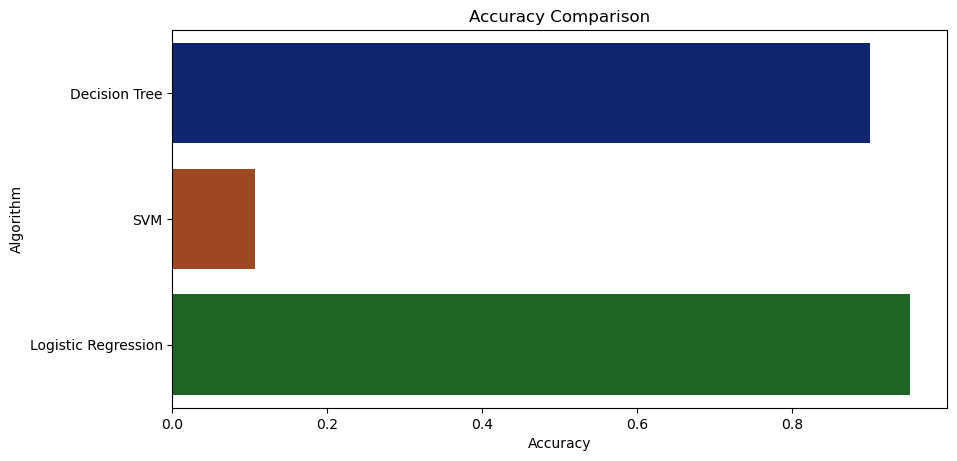

In [35]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

In [36]:
# Accuracy in number formate

In [37]:
accuracy_models = dict(zip(model, acc))
for k, v in accuracy_models.items():
    print (k, ' -->', v)

Decision Tree  --> 0.9
SVM  --> 0.10681818181818181
Logistic Regression  --> 0.9522727272727273


In [38]:
#Checking Highest Accuracy....
compare=pd.DataFrame({'Model' : ['Decision Tree', 'SVM', 'Logistic Regression'], 'Accuracy' : [score1.mean(),score2.mean(),score3.mean()]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Logistic Regression,0.954545
0,Decision Tree,0.914091
1,SVM,0.280000


# RECOMMENDATION MODEL :

In [40]:
df.head(1)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice


In [48]:
#numpy
import numpy as np

print("Enter You Input : ")
N,P,K,temp,hum,ph,rf=input("Nitrogen content in soil , Phosphorous content in soil , Potassium content in soil , temperature, humidity(%), ph, rainfall (mm) :").split()
print("-----------------------------------------------------------------------------")
print("Output : ")
print("         ")
print("N           : ",N)
print("P           : ",P)
print("K           : ",K)
print("Temperature : ",temp)
print("Humidity    : ",hum)                           
print("PH          : ",ph)
print("RainFall    : ",rf)
print("---------------")

data = np.array([[N,P,K,temp,hum,ph,rf]])
prediction = LogReg.predict(data)
print ("The suggest Crop from given climate condition is :", prediction)

Enter You Input : 
Nitrogen content in soil , Phosphorous content in soil , Potassium content in soil , temperature, humidity(%), ph, rainfall (mm) :


ValueError: not enough values to unpack (expected 7, got 0)

In [49]:
data = np.array([[83, 45, 60, 28, 70.3, 7.0, 150.9]])
prediction = LogReg.predict(data)
print ("The suggest Crop from given climate condition is :", prediction)

The suggest Crop from given climate condition is : ['jute']


In [50]:
data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
prediction = LogReg.predict(data)
print ("The suggest Crop from given climate condition is :", prediction)

The suggest Crop from given climate condition is : ['coffee']


In [51]:

data = np.array([[90, 42, 43, 20.87, 82.00, 6.502985, 202.93]])
prediction = LogReg.predict(data)
print ("The suggest Crop from given climate condition is :", prediction)

The suggest Crop from given climate condition is : ['rice']


In [52]:
data = np.array([[51,72,75,18.88852533,14.99451145,7.1042247970000005,80.111338]])
prediction = LogReg.predict(data)
print ("The suggest Crop from given climate condition is :", prediction)

The suggest Crop from given climate condition is : ['chickpea']


In [53]:
prediction = LogReg.predict((np.array([[20,
                                       30,
                                       10,
                                       15,
                                       90,
                                       7.5,
                                       100]])))
print ("The suggest Crop from given climate condition is :", prediction)

The suggest Crop from given climate condition is : ['orange']


# THANK YOU😄🌱

In [54]:
print("Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? \n\nData: The answer is : {}" .format(df[df['N'] > 120]['label'].unique()))
print("\n\nQuestion.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? \n\nData: The answer is : {}" .format(df[df['P'] > 100]['label'].unique()))
print("\n\nQuestion.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? \n\nData: The answer is : {}" .format(df[df['K'] > 200]['label'].unique()))
print("\n\nQuestion.No 4. Crops which requires very High Rainfall ? \n\nData: The answer is : {}" .format(df[df['rainfall'] > 200]['label'].unique()))
print("\n\nQuestion.No 5. Crops which requires very Low Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] < 10]['label'].unique()))
print("\n\nQuestion.No 6. Crops which requires very High Temperature ? \n\nData: The answer is : {}" .format(df[df['temperature'] > 40]['label'].unique()))
print("\n\nQuestion.No 7. Crops which requires very Low Humidity ? \n\nData: The answer is : {}" .format(df[df['humidity'] < 20]['label'].unique()))
print("\n\nQuestion.No 8. Crops which requires very Low pH ? \n\nData: The answer is : {}" .format(df[df['ph'] < 4]['label'].unique()))
print("\n\nQuestion.No 9. Crops which requires very High pH ? \n\nData: The answer is : {}" .format(df[df['ph'] > 9]['label'].unique()))

Question.No 1. Crops which requires very High Ratio of Nitrogen Content in Soil ? 

Data: The answer is : ['cotton']


Question.No 2. Crops which requires very High Ratio of Phosphorous Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 3. Crops which requires very High Ratio of Potassium Content in Soil ? 

Data: The answer is : ['grapes' 'apple']


Question.No 4. Crops which requires very High Rainfall ? 

Data: The answer is : ['rice' 'papaya' 'coconut']


Question.No 5. Crops which requires very Low Temperature ? 

Data: The answer is : ['grapes']


Question.No 6. Crops which requires very High Temperature ? 

Data: The answer is : ['grapes' 'papaya']


Question.No 7. Crops which requires very Low Humidity ? 

Data: The answer is : ['chickpea' 'kidneybeans']


Question.No 8. Crops which requires very Low pH ? 

Data: The answer is : ['mothbeans']


Question.No 9. Crops which requires very High pH ? 

Data: The answer is : ['mothbeans']


In [55]:
data = np.array([[51,72,75,18.88852533,14.99451145,7.1042247970000005,80.111338]])
prediction = DecisionTree.predict(data)
print(prediction)

['chickpea']
